# Sexual Offenses In Puerto Rico May Be Happening Much More Than What Official Reports Say...
Let's take a look at the numbers provided by the Police Department of the island and compare it to the statistics of other ngos. There will also be interviews... 
First Source: https://policia.pr.gov/estadisticas-delitos-sexuales-y-maltrato-a-menores/

In [80]:
# Data is either on the website or in PDF format. Let's build a scraper using beautiful soup.
from bs4 import BeautifulSoup
import urllib3

http = urllib3.PoolManager()

url = 'https://policia.pr.gov/estadisticas-delitos-sexuales-y-maltrato-a-menores/'
response = http.request('GET', url)
soup = BeautifulSoup(response.data)

C:\Users\User\AppData\Local\Programs\Python\Python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\User\AppData\Local\Programs\Python\Python36-32\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\User\AppData\Local\Programs\Python\Python36-32\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup

In [81]:
#response = requests.get("https://policia.pr.gov/estadisticas-delitos-sexuales-y-maltrato-a-menores/")
#doc = BeautifulSoup(response.text, 'html.parser')

In [82]:
for tr in soup.find_all('tr')[1:]:
    tds = tr.find_all('td')
    print (tds[0].text, tds[1].text, tds[2].text,tds[3].text,tds[4].text,tds[5].text,tds[6].text,tds[7].text, tds[8].text
           ,tds[9].text,tds[10].text,tds[11].text)

San Juan 122 34 7 115 28 0 15 1 0 1 15
Arecibo 78 74 14 64 6 0 5 18 0 1 1
Ponce 290 157 120 175 30 1 18 27 0 3 17
Humacao 41 25 4 37 7 0 5 12 0 0 0
Mayagüez 60 10 10 52 9 0 6 4 0 0 0
Caguas 81 12 18 63 0 0 3 5 0 0 0
Bayamón 145 81 27 118 10 0 9 19 0 5 14
Carolina 148 112 41 107 8 0 6 14 0 1 0
Guayama 79 14 14 65 22 0 10 7 0 1 4
Aguadilla 71 15 8 63 9 0 8 6 0 3 5
Utuado 60 60 23 48 8 1 6 2 0 2 2
Fajardo 49 39 9 40 2 0 2 5 0 0 0
Aibonito 39 23 4 35 8 0 7 3 0 0 0
Vega Baja 122 23 25 97 8 0 8 5 0 3 3
TOTAL 1385 679 324 1079 155 2 108 128 0 20 61


In [83]:
headers= soup.find_all('thead')[:]
for heads in headers:
        info = heads
        print(info.text)



ÁreaQuerellas RecibidasQuerellas EsclarecidasVíctima HombresVíctimas Mujeres Cantidad de ArrestosMás de Un  ArrestoRadicacíon de Cargos CriminalesIntervención con MenorMás de un Menor IntervenidoRadicación de FaltasCantidad de Convicción




In [84]:
# Year 2017
import pandas as pd
data = pd.read_csv('data\offenses.txt', sep=",", header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11
0,San Juan,122,34,7,115,28,0,15,1,0,1,15
1,Arecibo,78,74,14,64,6,0,5,18,0,1,1
2,Ponce,290,157,120,175,30,1,18,27,0,3,17
3,Humacao,41,25,4,37,7,0,5,12,0,0,0
4,Mayagüez,60,10,10,52,9,0,6,4,0,0,0
5,Caguas,81,12,18,63,0,0,3,5,0,0,0
6,Bayamón,145,81,27,118,10,0,9,19,0,5,14
7,Carolina,148,112,41,107,8,0,6,14,0,1,0
8,Guayama,79,14,14,65,22,0,10,7,0,1,4
9,Aguadilla,71,15,8,63,9,0,8,6,0,3,5


In [85]:
data.columns = ['Área', 'Querellas Recibidas', 'Querellas Esclarecidas', 'Víctima Hombres', 'Víctimas Mujeres', 
                'Cantidad de Arrestos', 'Más de Un  Arresto', 'Radicacíon de Cargos Criminales', 
                'Intervención con Menor', 'Más de un Menor Intervenido', 'Radicación de Faltas', 
                'Cantidad de Convicción']

In [86]:
df=pd.DataFrame(data)
df.to_csv('sexual_offensesPR2017.csv',index=False)

In [87]:
df

,Área,Querellas Recibidas,Querellas Esclarecidas,Víctima Hombres,Víctimas Mujeres,Cantidad de Arrestos,Más de Un Arresto,Radicacíon de Cargos Criminales,Intervención con Menor,Más de un Menor Intervenido,Radicación de Faltas,Cantidad de Convicción
0,San Juan,122,34,7,115,28,0,15,1,0,1,15
1,Arecibo,78,74,14,64,6,0,5,18,0,1,1
2,Ponce,290,157,120,175,30,1,18,27,0,3,17
3,Humacao,41,25,4,37,7,0,5,12,0,0,0
4,Mayagüez,60,10,10,52,9,0,6,4,0,0,0
5,Caguas,81,12,18,63,0,0,3,5,0,0,0
6,Bayamón,145,81,27,118,10,0,9,19,0,5,14
7,Carolina,148,112,41,107,8,0,6,14,0,1,0
8,Guayama,79,14,14,65,22,0,10,7,0,1,4
9,Aguadilla,71,15,8,63,9,0,8,6,0,3,5


In [88]:
#Year 2016
df2=pd.read_csv('data\Delitos sexuales enero a diciembre 2016 - Sheet1.csv')
df2

,Área,Querellas recibidas,Querellas esclarecidas,Víctimas hombres,Víctimas Mujeres,Cantidad de arrestos,Más de un arresto,Radicación de cargos criminales,Intervención con menor,Más de un menor intervenido,Radicación de faltas,Convicciones,Convicciones en proceso
0,San Juan,123,30,29,84,34,0,18,1,0,0,17,1
1,Arecibo,104,102,13,91,17,0,29,17,0,2,0,19
2,Ponce,173,22,44,132,8,0,5,3,0,0,1,5
3,Humacao,40,16,36,4,8,0,2,7,0,2,0,26
4,Mayagüez,23,1,6,17,6,0,6,1,0,0,0,5
5,Caguas,101,33,12,74,10,0,9,4,0,1,0,7
6,Bayamón,176,129,30,144,34,0,19,26,0,7,19,111
7,Carolina,85,52,11,75,10,0,6,8,0,3,1,5
8,Guayama,59,15,3,56,7,0,4,4,0,1,0,11
9,Aguadilla,72,59,12,60,7,0,7,6,0,3,5,190


In [89]:
import re
import matplotlib.pyplot as plt
from cycler import cycler
%matplotlib inline
import seaborn as sns
from matplotlib import font_manager
font_manager._rebuild()

In [90]:
#Year 2016
df2= df2.reindex()

In [92]:
df1 = df[['Área','Querellas Recibidas','Querellas Esclarecidas']][0:14].sort_values(by='Querellas Recibidas',ascending=False)[0:14]
df1

,Área,Querellas Recibidas,Querellas Esclarecidas
2,Ponce,290,157
7,Carolina,148,112
6,Bayamón,145,81
0,San Juan,122,34
13,Vega Baja,122,23
5,Caguas,81,12
8,Guayama,79,14
1,Arecibo,78,74
9,Aguadilla,71,15
4,Mayagüez,60,10


In [49]:
df3=df2[['Área','Querellas recibidas','Querellas esclarecidas']].sort_values(by='Querellas recibidas',ascending=False)
df3

,Área,Querellas recibidas,Querellas esclarecidas
6,Bayamón,176,129
2,Ponce,173,22
0,San Juan,123,30
1,Arecibo,104,102
5,Caguas,101,33
7,Carolina,85,52
9,Aguadilla,72,59
8,Guayama,59,15
11,Fajardo,54,7
12,Aibonito,50,38


In [50]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

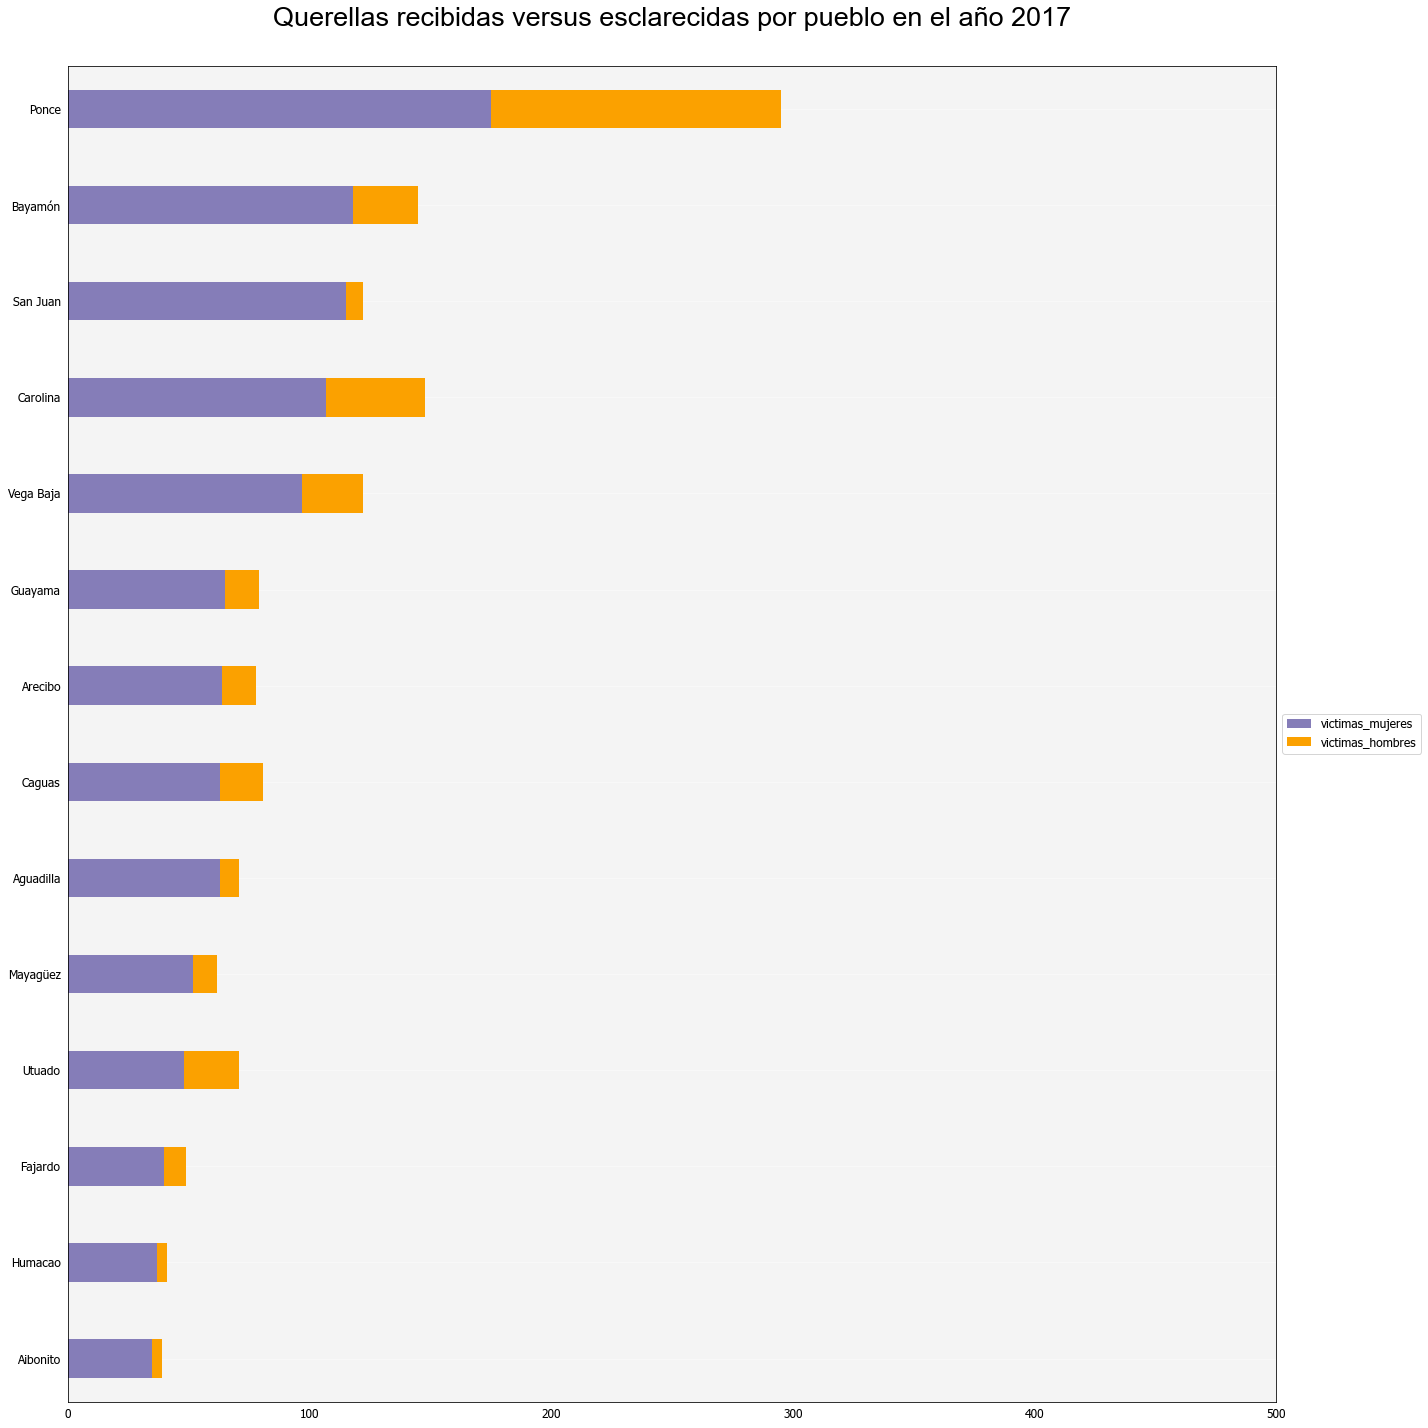

In [51]:
ax = df1.plot(kind='barh', x='Área', stacked=True, color=['#857db8','#fba100'], width=0.4, figsize=(20,20))
ax.set_title("Querellas recibidas versus esclarecidas por pueblo en el año 2017",pad=40)
ax.title.set_fontsize(27)
ax.title.set_fontname('Arial')

L = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.tick_params(which='major',left=False, bottom=False,grid_alpha=1.0)
ax.set_facecolor('#f4f4f4')

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
ax.set_xlim(0,500)
ax.yaxis.label.set_visible(False)
plt.gca().invert_yaxis()
plt.tight_layout()

ax.grid(True, axis='y', color='white', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif' : 'Tahoma',
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.size': 12,
    'text.color': 'black',
    'axes.labelcolor': 'black'
})
plt.savefig('Querellas2017.pdf')

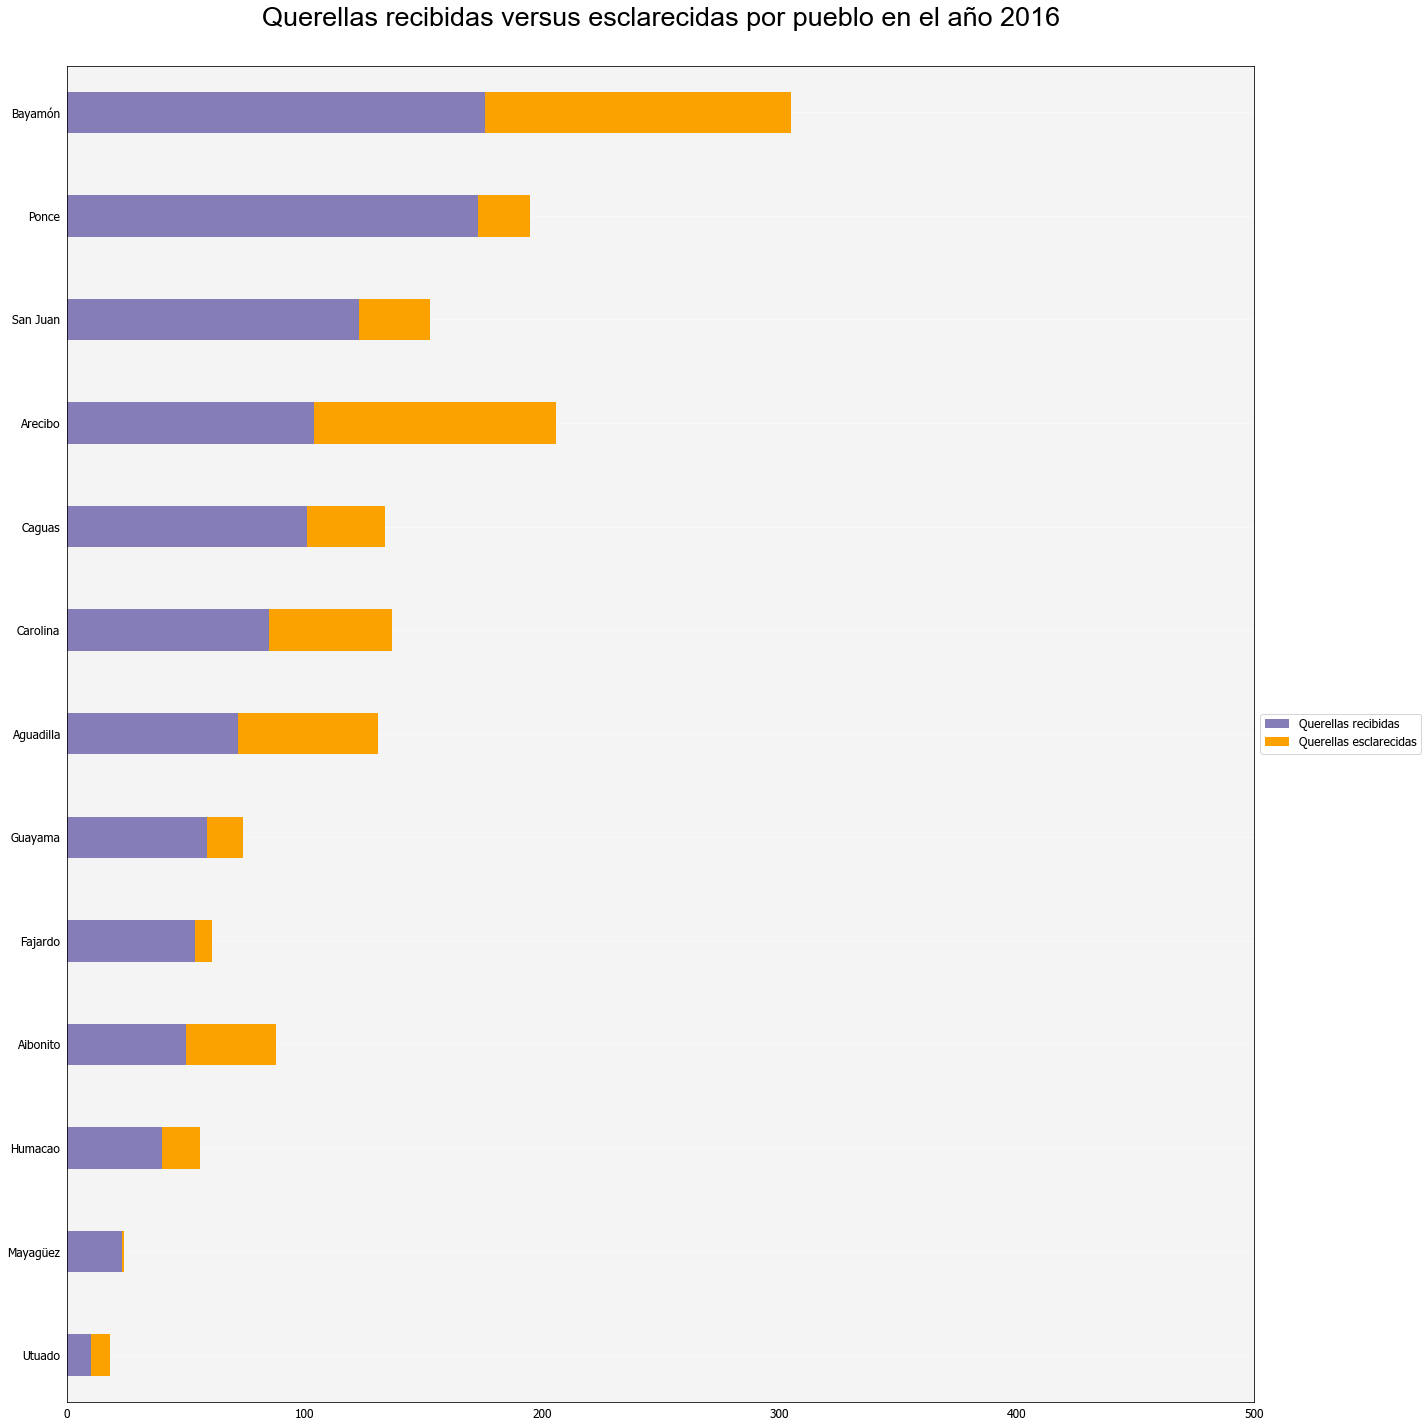

In [53]:
ax = df3.plot(kind='barh', x='Área', stacked=True, color=['#857db8','#fba100'], width=0.4, figsize=(20,20))
ax.set_title("Querellas recibidas versus esclarecidas por pueblo en el año 2016",pad=40)
ax.title.set_fontsize(27)
ax.title.set_fontname('Arial')

L = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.tick_params(which='major',left=False, bottom=False,grid_alpha=1.0)
ax.set_facecolor('#f4f4f4')

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)
ax.set_xlim(0,500)
ax.yaxis.label.set_visible(False)
plt.gca().invert_yaxis()
plt.tight_layout()

ax.grid(True, axis='y', color='white', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif' : 'Tahoma',
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.size': 12,
    'text.color': 'black',
    'axes.labelcolor': 'black'
})
plt.savefig('Querellas2016correct.pdf')

In [26]:
df= df.rename(columns={'Víctima Hombres': 'victimas_hombres', 'Víctimas Mujeres': 'victimas_mujeres'})

In [27]:
df1 = df[['Área','victimas_mujeres','victimas_hombres']][0:14].sort_values(by='victimas_mujeres',ascending=False)[0:14]
df1

,Área,victimas_mujeres,victimas_hombres
2,Ponce,175,120
6,Bayamón,118,27
0,San Juan,115,7
7,Carolina,107,41
13,Vega Baja,97,25
8,Guayama,65,14
1,Arecibo,64,14
5,Caguas,63,18
9,Aguadilla,63,8
4,Mayagüez,52,10


In [28]:
import numpy as np

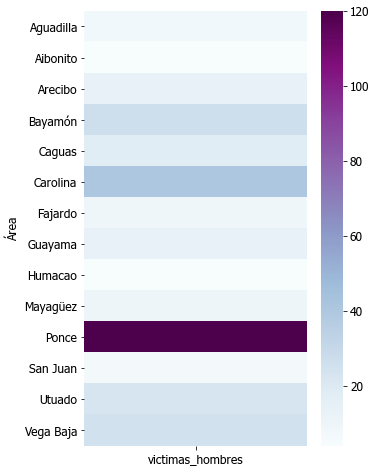

In [34]:
gendergraph= df1.pivot_table(index="Área",values="victimas_hombres", aggfunc="mean").fillna(0)
plt.figure(figsize=(5, 8))
cmaps = 'BuPu'
#gradient = np.linspace(0, 1, 256)
#gradient = np.vstack((gradient, gradient))
sns.heatmap(gendergraph, annot=None, cmap=cmaps)
#plt.tight_layout()
plt.savefig('Male_victims.pdf')
plt.show()

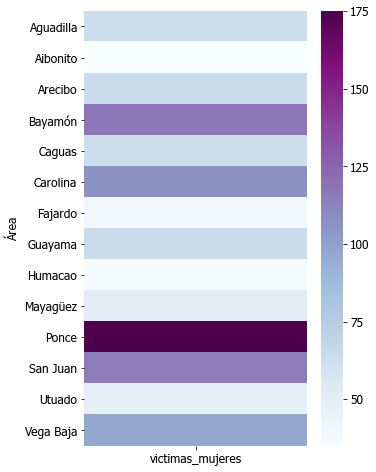

In [33]:
gendergraph= df1.pivot_table(index="Área",values="victimas_mujeres", aggfunc="mean").fillna(0)
plt.figure(figsize=(5, 8))
cmaps = 'BuPu'
#gradient = np.linspace(0, 1, 256)
#gradient = np.vstack((gradient, gradient))
sns.heatmap(gendergraph, annot=None, cmap=cmaps)
#plt.tight_layout()
plt.savefig('Female_victims.pdf')
plt.show()

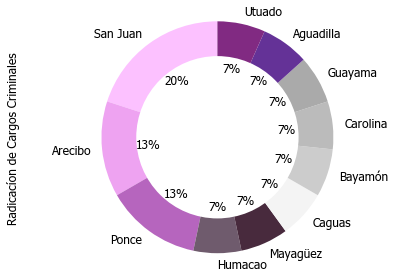

In [41]:
crimes= df.sort_values(by='Área',ascending=False)
labels = df['Área']
colors = ['#fcc1ff',
'#eea3f1',
'#b665be',	
'#6f5b6d', 	
'#482a3d',
'#f4f4f4',
'#cccccc',
'#bbbbbb',
'#aaaaaa',
'#643297',
'#812a82']
ax = crimes['Radicacíon de Cargos Criminales'].value_counts().plot(kind='pie', labels=labels, autopct='%1.0f%%',
                                                                            colors=colors, startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')  
plt.tight_layout()
plt.savefig('Radicacíon de cargos criminales por pueblo.pdf')

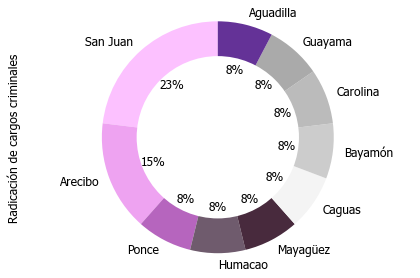

In [42]:
crimes= df2.sort_values(by='Área',ascending=False)
labels = df2['Área']
colors = ['#fcc1ff',
'#eea3f1',
'#b665be',	
'#6f5b6d', 	
'#482a3d',
'#f4f4f4',
'#cccccc',
'#bbbbbb',
'#aaaaaa',
'#643297',
'#812a82',
         '#c3cafb']
ax = crimes['Radicación de cargos criminales'].value_counts().plot(kind='pie', labels=labels, autopct='%1.0f%%',
                                                                            colors=colors, startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')  
plt.tight_layout()
plt.savefig('Radicacíon de cargos criminales por pueblo 2016.pdf')